## Author: Sruti Munukutla
## Project 2: Part 4

In [170]:
import numpy as np
X_train = np.loadtxt("UCI HAR Dataset/train/X_train.txt", dtype=float)
Y_train = np.loadtxt("UCI HAR Dataset/train/y_train.txt", dtype=float)
X_test = np.loadtxt("UCI HAR Dataset/test/X_test.txt", dtype=float)
y_actual = np.loadtxt("UCI HAR Dataset/test/y_test.txt", dtype=float)


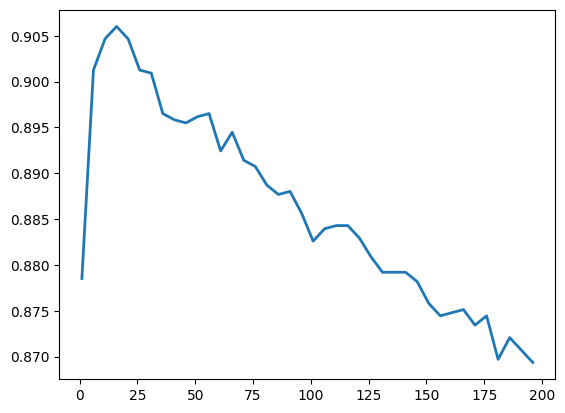

In [165]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt


x_arr = []
accuracy = []
for x in range(1, 200, 5):
    knn = KNeighborsClassifier(n_neighbors=x)
    knn.fit(X_train, Y_train)
    y_pred = knn.predict(X_test)
    x_arr.append(x)
    accuracy.append(metrics.accuracy_score(y_actual, y_pred))


# plot
fig, ax = plt.subplots()

ax.plot(x_arr, accuracy, linewidth=2.0)

plt.show()

In [166]:
import pandas as pd
import sys
import numpy as np


def pca(A, normalize=True):
    cols = len(A[0])
    rows = len(A)
    
    result = []
    # assign to m the mean values of the columns of A
    m = A.mean(axis=0)
    result.append(m)

    # assign to D the difference matrix A - m
    D = A - m

    if normalize:
        sd = np.std(D, axis=0)
    else:
        sd = [1 for x in range(0, cols)]
    result.append(sd)
    # Assign all 1s to the standard deviation vector (1 for each column)

    # Divide each column by its standard deviation vector
    #    (hint: this can be done as a single operation)
    D = np.divide(D, sd)

    result.append(D)

    # assign to U, S, V the result of running np.svd on D, with full_matrices=False
    U, S, V = np.linalg.svd(D)

    S_square = np.square(S)
    eigenvalues = np.divide(S_square, (rows - 1))
    result.append(eigenvalues)

    # the eigenvalues of cov(A) are the squares of the singular values (S matrix)
    #   divided by the degrees of freedom (N-1). The values are sorted.
    result.append(V)

    projected_data = np.matmul(V,np.transpose(D))
    projected_data = np.transpose(projected_data)
    result.append(projected_data)
    # project the data onto the eigenvectors. Treat V as a transformation
    #   matrix and right-multiply it by D transpose. The eigenvectors of A
    #   are the rows of V. The eigenvectors match the order of the eigenvalues.

    # create a new data frame out of the projected data
    # return the means, standard deviations, eigenvalues, eigenvectors, and projected data
#     result: m, sd, D, eigenvalues, V, projected_data
    return result

result = pca(X_train)
eigenvalues = result[3]
total_sum = sum(eigenvalues)
running_sum = 0
dimensions = 0

for value in eigenvalues:
    running_sum += value
    if running_sum/total_sum >= 0.9:
        dimensions += 1
        break
    dimensions += 1

projected_data = result[5]
df_data = pd.DataFrame(projected_data)
reduced_dimension_data = df_data.iloc[: , :dimensions]

        

In [167]:
#using results of training data with reduced dimensions to perform pca on test data.
training_set_mean = result[0]
D_test = np.array(X_test) - training_set_mean
training_set_sd = np.array(result[1])
D_test = np.divide(D_test, training_set_sd)
eigenvectors_training = result[4]
D_test = np.matmul(eigenvectors_training, np.transpose(D_test))
df_test_data = pd.DataFrame(D_test)
df_test_data = np.transpose(df_test_data)

reduced_dimension_test_data = df_test_data.iloc[: , :dimensions]


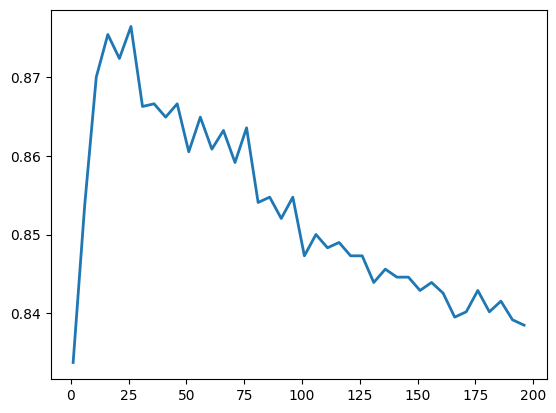

In [168]:
#incrementing k from 1 - 200 in steps of 5 to see how accuracy of the model/prediction accuracy changes.
x_arr = []
accuracy = []
for x in range(1, 200, 5):
    knn = KNeighborsClassifier(n_neighbors=x)
    knn.fit(reduced_dimension_data, Y_train)
    y_pred = knn.predict(reduced_dimension_test_data)
    x_arr.append(x)
    accuracy.append(metrics.accuracy_score(y_actual, y_pred))


# plot
fig, ax = plt.subplots()

ax.plot(x_arr, accuracy, linewidth=2.0)

plt.show()